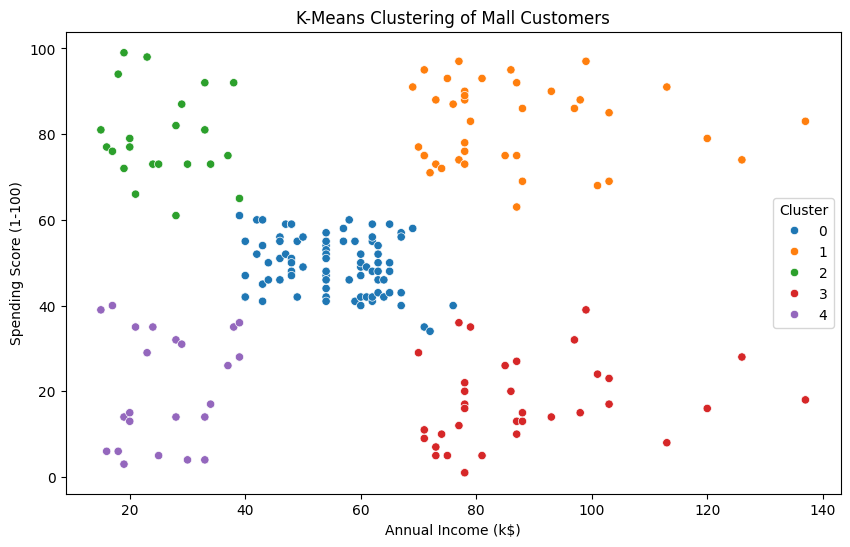

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('mall_customers.csv')

# Preprocess the data
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]


# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
data['Clusters'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Clusters', palette='tab10')

plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.579220779226, 26686.83778518778, 24766.471609793443, 23103.122085983916]


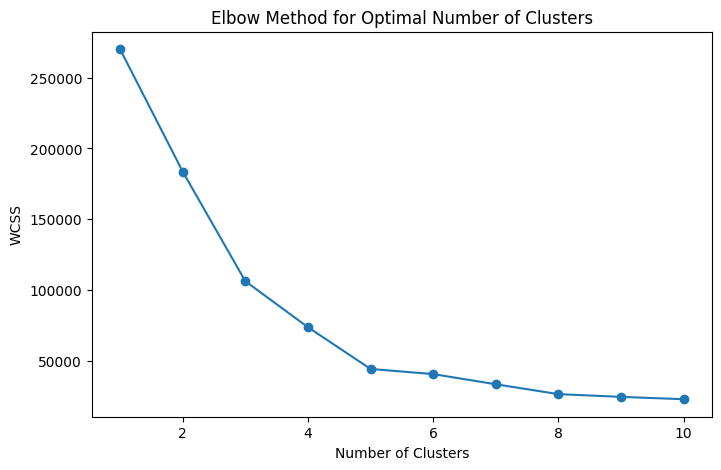

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to hold WCSS values
wcss = []

# Loop over a range of cluster numbers
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)  # scaled_features is the standardized data
    wcss.append(kmeans.inertia_)
    
print(wcss)
# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


[0.39564531743995546, 0.46761358158775435, 0.4937945814354117, 0.553931997444648, 0.5128405328004378, 0.5017174409749505, 0.4962769338093321, 0.45587414130065596, 0.4426214845978157]


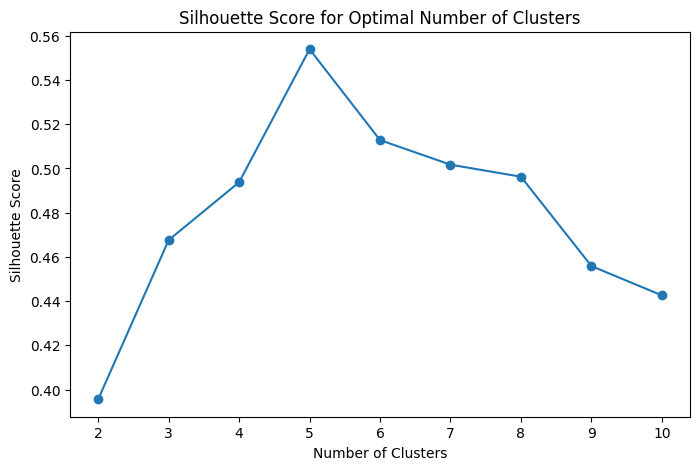

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# List to hold silhouette scores
silhouette_scores = []

# Loop over a range of cluster numbers
for i in range(2, 11):  # Minimum number of clusters is 2
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)
print(silhouette_scores)
# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
